## The third In-class-exercise (2/22/2022, 40 points in total)

The purpose of this exercise is to understand text representation.

Question 1 (10 points): Describe an interesting text classification or text mining task and explain what kind of features might be useful for you to build the machine learning model. List your features and explain why these features might be helpful. You need to list at least five different types of features.

In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
 
I want to understand the users' sentiment towards a product. 
Here, I want to focus on 'oximeter'. Many people started using it to monitor their health during the COVID-19 pandemic.
 
Now, I wanted to understand what features are more useful and what people are feeling about the product. 
 
To start with, I want to focus on a specific manufacturer’s product and perform sentiment analysis on user reviews. The sentiment analysis will give me insights on users’ feedback and the frequency vector for the data cloud would give me the information on features that the users are reviewing. 
 
For my sentiment analysis on reviews text, I would like to use the POS tagging (Parts of Speach) technique. Parts of speech in the text define the main context, functions, and usage in a sentence. In this method, I am going to label each word on the text corresponding to a particular part of speech based on the definitions and context. 
 
Some of the speech tags that I intended to focus on are: 
Nouns, verbs, personal pronouns, Adjective, Adverbs, Coordinating conjunction, Interjections
 
These POS tagged reviews are converted into a matrix of numbers which is given as an input to classifiers. The Classifier will detect the sentiment in the text. 
 
Here is the link for reviews of the product 'Zacurate Pro Series 500DL Fingertip Pulse Oximeter':  https://www.amazon.com/Zacurate-Fingertip-Oximeter-Saturation-Batteries/product-reviews/B07PQ8WTC4/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber=3




'''

Question 2 (20 points): Write python code to extract these features you discussed above. You can collect a few sample text data for the feature extraction. 

In [51]:
# You code here (Please add comments in the code):

# Extract reviews 


## import libraries
from bs4 import BeautifulSoup
import requests
import urllib.request
import re
import pandas as pd

# headers to open the link

headers = {
    'Access-Control-Allow-Origin': '*',
    'Access-Control-Allow-Methods': 'GET',
    'Access-Control-Allow-Headers': 'Content-Type',
    'Access-Control-Max-Age': '3600',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0',
    'Accept-Language': 'en-US, en;q=0.5'
}

r_titles = []
r_text=[]
for pg_num in range(1,150):
  r_url = f'https://www.amazon.com/Zacurate-Fingertip-Oximeter-Saturation-Batteries/product-reviews/B07PQ8WTC4/ref=cm_cr_arp_d_paging_btm_next_{str(pg_num)}?ie=UTF8&reviewerType=all_reviews&pageNumber={str(pg_num)}'
 
  # Launch the page
  page = requests.get(r_url, headers=headers)
  # read page content
  soup = BeautifulSoup(page.content,'html.parser')

  # Select all title elemets
  review_titles = soup.find_all('a',class_='review-title-content')
  
  # Extract title text from the dom element
  for t in range(len(review_titles)):
    r_titles.append(review_titles[t].get_text().strip())


   # Select all rating dom elements
  review_text_dom= soup.find_all('span',class_='review-text-content')
  
  # Extract review text text from the dom element
  for rt in range(0,len(review_text_dom)):
    r_text.append(review_text_dom[rt].get_text().strip())


# Create a data frame 
df_reviews = pd.DataFrame({
    'Title' : r_titles,
    'Review': r_text
})
print(f'Shape of the data frame: {df_reviews.shape}')
df_reviews

Shape of the data frame: (1490, 2)


,Title,Review
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was..."
1,Slow and unreliable,I am a retired doctor and just purchased two p...
2,Very inaccurate reading - led to uncessary eme...,I'm a physician. I bought the device to have ...
3,Waste of money!,"I was hoping this would be a good product, but..."
4,Pulse & Oxygen display,"Great, easy to understand instructions and the..."
...,...,...
1485,Great Little Oxygen Monitor,This unit is great...nice size and easy to use...
1486,Poor quality,Not a fan of this pulse ox. The on/off button ...
1487,Excellent product,"While not listed as a “medical grade” item, I ..."
1488,"Works good, does what it’s supposed to do.",Used to monitor our pulse ox during Covid.My c...


#### Data cleaning

##### Remove punctuations

In [52]:
df_reviews["preprocessed_review"] = df_reviews['Review'].str.replace('[^\w\s]','')
df_reviews

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Title,Review,preprocessed_review
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",In this uncertain Covid era we learned it was ...
1,Slow and unreliable,I am a retired doctor and just purchased two p...,I am a retired doctor and just purchased two p...
2,Very inaccurate reading - led to uncessary eme...,I'm a physician. I bought the device to have ...,Im a physician I bought the device to have at...
3,Waste of money!,"I was hoping this would be a good product, but...",I was hoping this would be a good product but ...
4,Pulse & Oxygen display,"Great, easy to understand instructions and the...",Great easy to understand instructions and the ...
...,...,...,...
1485,Great Little Oxygen Monitor,This unit is great...nice size and easy to use...,This unit is greatnice size and easy to use Or...
1486,Poor quality,Not a fan of this pulse ox. The on/off button ...,Not a fan of this pulse ox The onoff button br...
1487,Excellent product,"While not listed as a “medical grade” item, I ...",While not listed as a medical grade item I fin...
1488,"Works good, does what it’s supposed to do.",Used to monitor our pulse ox during Covid.My c...,Used to monitor our pulse ox during CovidMy ci...


##### Remove numbers and special characters

In [53]:
# Remove numbers
df_reviews["preprocessed_review"] = df_reviews['preprocessed_review'].str.replace('\d+', '')
# remove special characters
import re
df_reviews["preprocessed_review"] = df_reviews['preprocessed_review'].apply(lambda t : ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', ch) for ch in t))
df_reviews

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,Title,Review,preprocessed_review
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",In this uncertain Covid era we learned it was ...
1,Slow and unreliable,I am a retired doctor and just purchased two p...,I am a retired doctor and just purchased two p...
2,Very inaccurate reading - led to uncessary eme...,I'm a physician. I bought the device to have ...,Im a physician I bought the device to have at...
3,Waste of money!,"I was hoping this would be a good product, but...",I was hoping this would be a good product but ...
4,Pulse & Oxygen display,"Great, easy to understand instructions and the...",Great easy to understand instructions and the ...
...,...,...,...
1485,Great Little Oxygen Monitor,This unit is great...nice size and easy to use...,This unit is greatnice size and easy to use Or...
1486,Poor quality,Not a fan of this pulse ox. The on/off button ...,Not a fan of this pulse ox The onoff button br...
1487,Excellent product,"While not listed as a “medical grade” item, I ...",While not listed as a medical grade item I fin...
1488,"Works good, does what it’s supposed to do.",Used to monitor our pulse ox during Covid.My c...,Used to monitor our pulse ox during CovidMy ci...


##### Make text to lower case

In [54]:
df_reviews['preprocessed_review'] = df_reviews['preprocessed_review'].apply(lambda text: " ".join(word.lower() for word in text.split()))
df_reviews

,Title,Review,preprocessed_review
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",in this uncertain covid era we learned it was ...
1,Slow and unreliable,I am a retired doctor and just purchased two p...,i am a retired doctor and just purchased two p...
2,Very inaccurate reading - led to uncessary eme...,I'm a physician. I bought the device to have ...,im a physician i bought the device to have at ...
3,Waste of money!,"I was hoping this would be a good product, but...",i was hoping this would be a good product but ...
4,Pulse & Oxygen display,"Great, easy to understand instructions and the...",great easy to understand instructions and the ...
...,...,...,...
1485,Great Little Oxygen Monitor,This unit is great...nice size and easy to use...,this unit is greatnice size and easy to use or...
1486,Poor quality,Not a fan of this pulse ox. The on/off button ...,not a fan of this pulse ox the onoff button br...
1487,Excellent product,"While not listed as a “medical grade” item, I ...",while not listed as a medical grade item i fin...
1488,"Works good, does what it’s supposed to do.",Used to monitor our pulse ox during Covid.My c...,used to monitor our pulse ox during covidmy ci...


##### Remove stop words

In [55]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger is already up-to-date!
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger_ru is already up-to-
       |       date!
       | Downloading package basque_grammars to /root/nltk_data...
       |   Package basque_grammars is already up-to-date!


True

In [56]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
df_reviews['preprocessed_review'] = df_reviews['preprocessed_review'].apply( lambda text : " ".join(word for word in text.split() if word not in stop_words) )
df_reviews

,Title,Review,preprocessed_review
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",uncertain covid era learned wise oximeter hand...
1,Slow and unreliable,I am a retired doctor and just purchased two p...,retired doctor purchased two pulse oximeters c...
2,Very inaccurate reading - led to uncessary eme...,I'm a physician. I bought the device to have ...,im physician bought device home covid pandemic...
3,Waste of money!,"I was hoping this would be a good product, but...",hoping would good product unfortunately instru...
4,Pulse & Oxygen display,"Great, easy to understand instructions and the...",great easy understand instructions unit works ...
...,...,...,...
1485,Great Little Oxygen Monitor,This unit is great...nice size and easy to use...,unit greatnice size easy use ordering easy del...
1486,Poor quality,Not a fan of this pulse ox. The on/off button ...,fan pulse ox onoff button broke ish uses weeks...
1487,Excellent product,"While not listed as a “medical grade” item, I ...",listed medical grade item find helpful days vi...
1488,"Works good, does what it’s supposed to do.",Used to monitor our pulse ox during Covid.My c...,used monitor pulse ox covidmy circulation good...


##### Lemmatization

In [60]:
from textblob import Word

In [61]:
df_reviews['preprocessed_review'] = df_reviews['preprocessed_review'].apply( lambda text : " ".join([ Word(w).lemmatize() for w in text.split()]))
df_reviews

,Title,Review,preprocessed_review
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",uncertain covid era learned wise oximeter hand...
1,Slow and unreliable,I am a retired doctor and just purchased two p...,retired doctor purchased two pulse oximeter ca...
2,Very inaccurate reading - led to uncessary eme...,I'm a physician. I bought the device to have ...,im physician bought device home covid pandemic...
3,Waste of money!,"I was hoping this would be a good product, but...",hoping would good product unfortunately instru...
4,Pulse & Oxygen display,"Great, easy to understand instructions and the...",great easy understand instruction unit work on...
...,...,...,...
1485,Great Little Oxygen Monitor,This unit is great...nice size and easy to use...,unit greatnice size easy use ordering easy del...
1486,Poor quality,Not a fan of this pulse ox. The on/off button ...,fan pulse ox onoff button broke ish us week do...
1487,Excellent product,"While not listed as a “medical grade” item, I ...",listed medical grade item find helpful day vir...
1488,"Works good, does what it’s supposed to do.",Used to monitor our pulse ox during Covid.My c...,used monitor pulse ox covidmy circulation good...


#### POS tagging

In [62]:
from nltk import pos_tag
df_reviews['tagged_pos'] = df_reviews['preprocessed_review'].str.split().map(pos_tag)
df_reviews

,Title,Review,preprocessed_review,tagged_pos
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",uncertain covid era learned wise oximeter hand...,"[(uncertain, JJ), (covid, NN), (era, NN), (lea..."
1,Slow and unreliable,I am a retired doctor and just purchased two p...,retired doctor purchased two pulse oximeter ca...,"[(retired, JJ), (doctor, NN), (purchased, VBD)..."
2,Very inaccurate reading - led to uncessary eme...,I'm a physician. I bought the device to have ...,im physician bought device home covid pandemic...,"[(im, NN), (physician, NN), (bought, VBD), (de..."
3,Waste of money!,"I was hoping this would be a good product, but...",hoping would good product unfortunately instru...,"[(hoping, VBG), (would, MD), (good, JJ), (prod..."
4,Pulse & Oxygen display,"Great, easy to understand instructions and the...",great easy understand instruction unit work on...,"[(great, JJ), (easy, JJ), (understand, JJ), (i..."
...,...,...,...,...
1485,Great Little Oxygen Monitor,This unit is great...nice size and easy to use...,unit greatnice size easy use ordering easy del...,"[(unit, NN), (greatnice, NN), (size, NN), (eas..."
1486,Poor quality,Not a fan of this pulse ox. The on/off button ...,fan pulse ox onoff button broke ish us week do...,"[(fan, NN), (pulse, JJ), (ox, NN), (onoff, IN)..."
1487,Excellent product,"While not listed as a “medical grade” item, I ...",listed medical grade item find helpful day vir...,"[(listed, VBN), (medical, JJ), (grade, NN), (i..."
1488,"Works good, does what it’s supposed to do.",Used to monitor our pulse ox during Covid.My c...,used monitor pulse ox covidmy circulation good...,"[(used, VBN), (monitor, NN), (pulse, JJ), (ox,..."


#### Add count of each POS for each row


##### Meaning of some of the tags code
Nouns - NN
verb - VB
personal pronouns - PRP
Adjective - JJR, JJS
Adverbs - RB
Coordinating conjunction - CC 
Interjections - UH

In [63]:
adj = []
adv = []
c_conjection = []
s_conjuction = []
interjection = []
noun = []
verb = []
p_pronoun = []
predeterminer = []
determiner = []



In [64]:
def count_tags(all_tags):
  for tags in all_tags:
    num_adj= 0
    num_adverb = 0
    num_c_conjunction= 0
    num_s_conjuction = 0
    num_interjection = 0
    num_noun = 0
    num_verb= 0
    num_p_pronoun = 0
    num_predeterminer = 0
    num_determiner = 0
    for w, t in tags:
      if t == 'JJ':
        num_adj =  num_adj + 1
      elif t == 'RB':
        num_adverb = num_adverb + 1
      elif t == 'CC':
        num_c_conjunction = num_c_conjunction + 1
      elif t == 'UH':
        num_interjection = num_interjection + 1
      elif t == 'NN':
        num_noun = num_noun + 1
      elif t == 'VR':
        num_verb = num_verb + 1
      elif t == 'PRP':
        num_p_pronoun = num_p_pronoun + 1
      elif t == 'PDT':
        num_predeterminer = num_predeterminer + 1
      elif t == 'DT':
        num_determiner = num_determiner + 1
      elif t == 'IN':
        num_s_conjuction = num_s_conjuction + 1
    
    adj.append(num_adj)
    adv.append(num_adverb)
    c_conjection.append(num_c_conjunction)
    s_conjuction.append(num_s_conjuction)
    interjection.append(num_interjection)
    noun.append(num_noun)
    verb.append(num_verb)
    p_pronoun.append(num_p_pronoun)
    predeterminer.append(num_predeterminer)
    determiner.append(num_determiner)


In [65]:
count_tags(df_reviews['tagged_pos'])

## Add POS tag count to the data frame
df_reviews['num_adj'] = adj
df_reviews['num_adverb'] = adv
df_reviews['num_c_conjunction'] = c_conjection
df_reviews['num_s_conjuction'] = s_conjuction
df_reviews['num_interjection'] = interjection
df_reviews['num_noun'] = noun
df_reviews['num_verb'] = verb
df_reviews['num_p_pronoun'] = p_pronoun
df_reviews['num_predeterminer'] = predeterminer
df_reviews['num_determiner'] = determiner

df_reviews

,Title,Review,preprocessed_review,tagged_pos,num_adj,num_adverb,num_c_conjunction,num_s_conjuction,num_interjection,num_noun,num_verb,num_p_pronoun,num_predeterminer,num_determiner
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",uncertain covid era learned wise oximeter hand...,"[(uncertain, JJ), (covid, NN), (era, NN), (lea...",52,28,0,2,0,90,0,0,0,0
1,Slow and unreliable,I am a retired doctor and just purchased two p...,retired doctor purchased two pulse oximeter ca...,"[(retired, JJ), (doctor, NN), (purchased, VBD)...",18,7,0,1,0,32,0,0,0,0
2,Very inaccurate reading - led to uncessary eme...,I'm a physician. I bought the device to have ...,im physician bought device home covid pandemic...,"[(im, NN), (physician, NN), (bought, VBD), (de...",11,3,0,1,0,33,0,0,0,0
3,Waste of money!,"I was hoping this would be a good product, but...",hoping would good product unfortunately instru...,"[(hoping, VBG), (would, MD), (good, JJ), (prod...",7,5,0,0,0,19,0,0,0,1
4,Pulse & Oxygen display,"Great, easy to understand instructions and the...",great easy understand instruction unit work on...,"[(great, JJ), (easy, JJ), (understand, JJ), (i...",3,0,0,0,0,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,Great Little Oxygen Monitor,This unit is great...nice size and easy to use...,unit greatnice size easy use ordering easy del...,"[(unit, NN), (greatnice, NN), (size, NN), (eas...",4,3,0,0,0,12,0,0,0,0
1486,Poor quality,Not a fan of this pulse ox. The on/off button ...,fan pulse ox onoff button broke ish us week do...,"[(fan, NN), (pulse, JJ), (ox, NN), (onoff, IN)...",11,6,0,1,0,14,0,1,0,0
1487,Excellent product,"While not listed as a “medical grade” item, I ...",listed medical grade item find helpful day vir...,"[(listed, VBN), (medical, JJ), (grade, NN), (i...",7,4,0,0,0,13,0,0,0,0
1488,"Works good, does what it’s supposed to do.",Used to monitor our pulse ox during Covid.My c...,used monitor pulse ox covidmy circulation good...,"[(used, VBN), (monitor, NN), (pulse, JJ), (ox,...",7,1,0,0,0,15,0,0,0,1


Question 3 (10 points): Use any of the feature selection methods mentioned in this paper "Deng, X., Li, Y., Weng, J., & Zhang, J. (2019). Feature selection for text classification: A review. Multimedia Tools & Applications, 78(3)." Select the most important features you extracted above, rank the features based on their importance in the descending order. 

I am going to use **correlation** as a filter method type for feature selection. I would select the features based on threasold correlation among features.


In [66]:
# You code here (Please add comments in the code):


# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_features = df_reviews.select_dtypes(include=numerics)
print(f'Shape: {numeric_features.shape}')
numeric_features

Shape: (1490, 10)


,num_adj,num_adverb,num_c_conjunction,num_s_conjuction,num_interjection,num_noun,num_verb,num_p_pronoun,num_predeterminer,num_determiner
0,52,28,0,2,0,90,0,0,0,0
1,18,7,0,1,0,32,0,0,0,0
2,11,3,0,1,0,33,0,0,0,0
3,7,5,0,0,0,19,0,0,0,1
4,3,0,0,0,0,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1485,4,3,0,0,0,12,0,0,0,0
1486,11,6,0,1,0,14,0,1,0,0
1487,7,4,0,0,0,13,0,0,0,0
1488,7,1,0,0,0,15,0,0,0,1


In [67]:
x = numeric_features
y = df_reviews['preprocessed_review']
print(f'Shape of X: {x.shape}')
print(f'SHape of Y: {y.shape}')


Shape of X: (1490, 10)
SHape of Y: (1490,)


In [68]:
# Split the data as train and test data
# Train data :80%, Test data: 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=60)
x_train.shape, x_test.shape

((1192, 10), (298, 10))

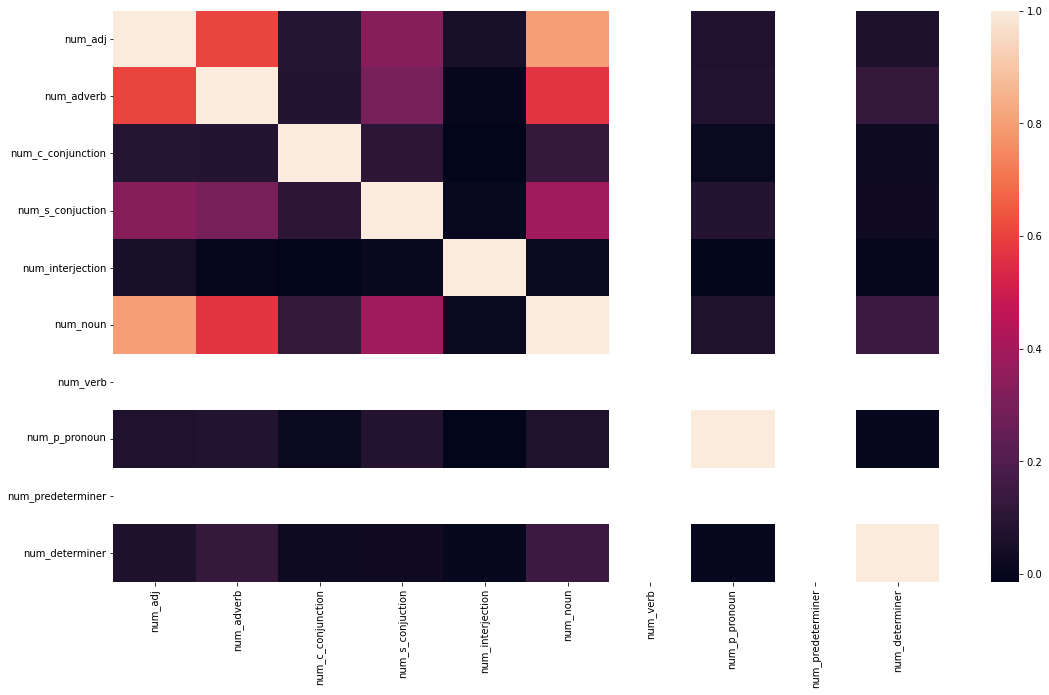

In [69]:
# Heat map for correlated features
correlation = x_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
sns.heatmap(correlation)

##### Extract correlated fetures based on threasold value (0.8)


In [70]:
def get_correlated_cols(corr, threshold):
  corr_col = []
  corr_data = corr.corr()
  for row in range(len(corr_data.columns)):
    for col in range(row):
      if (abs(corr_data.iloc[row, col]) > threshold):
        corr_col.append(corr_data.columns[row])
  return corr_col


highly_corr_colums = list(set(get_correlated_cols(x_train, 0.5)))
print(f'correlated features are: {set(highly_corr_colums)}')



correlated features are: {'num_adverb', 'num_noun'}


##### Using Random Forest Classifier to get important features

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
forest_classifier = RandomForestClassifier(n_estimators=20, random_state=100, max_depth=2)
forest_classifier.fit(x_train[highly_corr_colums].fillna(0), y_train)


RandomForestClassifier(max_depth=2, n_estimators=20, random_state=100)

In [73]:
# Get Feature
weight = pd.concat([pd.Series(highly_corr_colums), pd.Series(forest_classifier.feature_importances_)], axis=1)
weight.columns = ['columns', 'weight']
weight.sort_values(by='weight', ascending=False)

,columns,weight
0,num_adverb,0.554437
1,num_noun,0.445563
